In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import phate
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib

In [3]:
sample_n = 5000
df = pd.read_pickle("../data/df_final.pkl").head(sample_n).reset_index(drop=True)
embeddings = np.vstack(df["embedding"].values)

# Remove duplicates
embeddings, unique_idx = np.unique(embeddings, axis=0, return_index=True)
df = df.iloc[unique_idx].reset_index(drop=True)

print(f"Remaining unique rows: {len(df)}")

Remaining unique rows: 4744


In [4]:
# Dimensionality Reduction
print("📉 Running PCA...")
pca_result = PCA(n_components=2).fit_transform(embeddings)

print("🌀 Running t-SNE...")
tsne_result = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(embeddings)

print("🌌 Running UMAP...")
umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(embeddings)

print("🔮 Running PHATE...")
phate_result = phate.PHATE(n_components=2, n_jobs=-1, n_pca = 300).fit_transform(embeddings)

📉 Running PCA...
🌀 Running t-SNE...
🌌 Running UMAP...


/mnt/home/bhatta73/.local/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


🔮 Running PHATE...
Calculating PHATE...
  Running PHATE on 4744 observations and 384 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 43.73 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.31 seconds.
    Calculating affinities...
    Calculated affinities in 1.33 seconds.
  Calculated graph and diffusion operator in 47.40 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 20.33 seconds.
    Calculating KMeans...
    Calculated KMeans in 25.14 seconds.
  Calculated landmark operator in 46.34 seconds.
  Calculating optimal t...
    Automatically selected t = 41
  Calculated optimal t in 85.92 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.11 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.14 seconds.
Calculated PHATE in 189.95 seconds.


In [6]:
# Add results to DataFrame
df["PCA1"], df["PCA2"] = pca_result[:,0], pca_result[:,1]
df["TSNE1"], df["TSNE2"] = tsne_result[:,0], tsne_result[:,1]
df["UMAP1"], df["UMAP2"] = umap_result[:,0], umap_result[:,1]
df["PHATE1"], df["PHATE2"] = phate_result[:,0], phate_result[:,1]

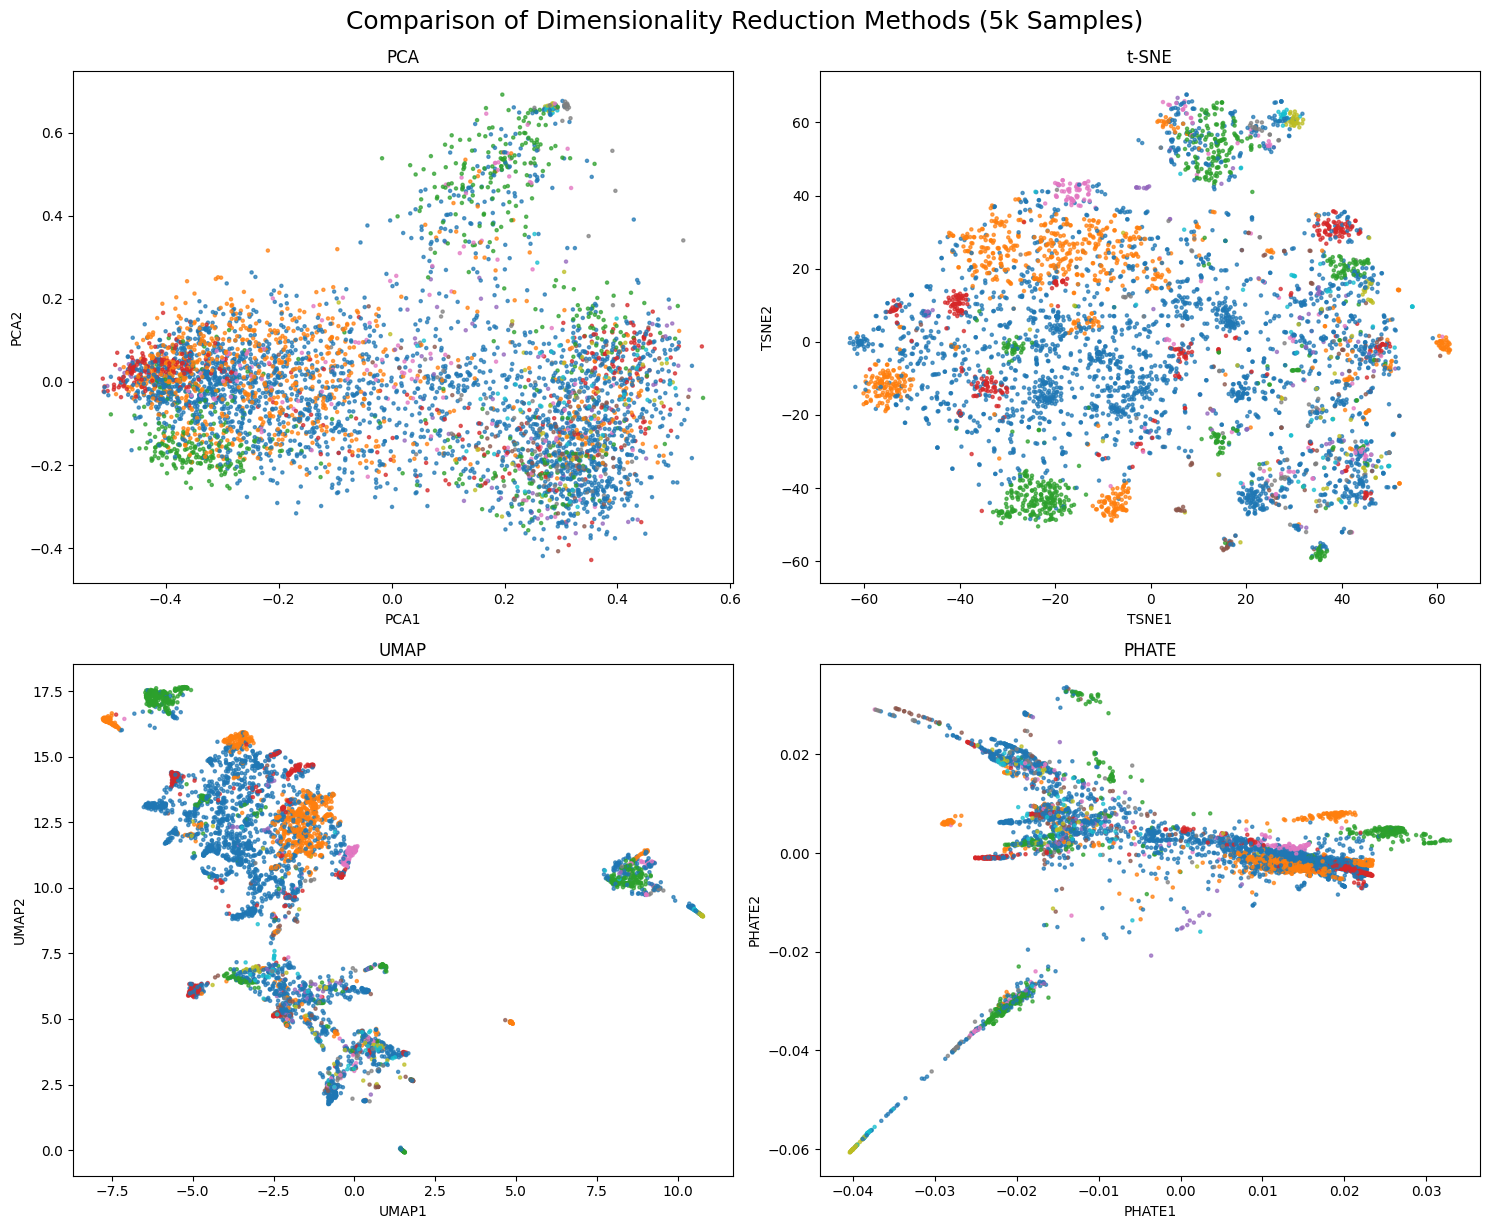

In [7]:
# Non-interactive plot

# Set up figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

methods = ["PCA", "t-SNE", "UMAP", "PHATE"]
coords = [("PCA1", "PCA2"), ("TSNE1", "TSNE2"), ("UMAP1", "UMAP2"), ("PHATE1", "PHATE2")]

for i, (method, (x_col, y_col)) in enumerate(zip(methods, coords)):
    ax = axes[i]
    scatter = ax.scatter(
        df[x_col], df[y_col], 
        c=pd.factorize(df["topic_label"])[0],  # color by topic (numeric encoding)
        cmap='tab10',  # or any colormap you like
        s=5,
        alpha=0.7
    )
    ax.set_title(method)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

plt.tight_layout()
plt.suptitle('Comparison of Dimensionality Reduction Methods (5k Samples)', fontsize=18, y=1.02)
fig.savefig("../outputs/comparison_static.png", dpi=300)
# plt.show()

In [ ]:
# Plot (subplots)
# Define layout
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("PCA", "t-SNE", "UMAP", "PHATE"),
    horizontal_spacing=0.05, vertical_spacing=0.1
)

methods = ["PCA", "t-SNE", "UMAP", "PHATE"]
coords = [("PCA1", "PCA2"), ("TSNE1", "TSNE2"), ("UMAP1", "UMAP2"), ("PHATE1", "PHATE2")]

# Add one plot per method
for i, (method, (x_col, y_col)) in enumerate(zip(methods, coords)):
    scatter_fig = px.scatter(
        df,
        x=x_col,
        y=y_col,
        color="topic_label",
        hover_data=["processed_comment"],
    )
    for trace in scatter_fig.data:
        fig.add_trace(trace, row=(i//2)+1, col=(i%2)+1)

fig.update_layout(
    height=1000,
    width=1600,
    title_text="Comparison of Dimensionality Reduction Methods (5k Samples)",
    showlegend=True
)

# fig.write_html("../outputs/comparison_interactive.html", include_plotlyjs="cdn")
fig.write_image("../outputs/comparison_interactive.png", scale=2)
fig.show()